# Predict Prices of Used Cars

## Executive Summary
#### Problem Statement
Discount Motors, a UK company selling used cars, wants to build a model for estimating the sales price of cars. Their most experienced sales team member who is very skilled at calculating sales prices is going to retire next month. Currently the rest of the sales team can only predict prices within 30% of the listed price and the goal is to achieve 10%. Discount Motors would like to automate the process of estimating prices.

#### Data
The sales team has pulled some data from the website listings from the last six months. All cars in the dataset were sold at the price listed. The data hasn’t been validated. The file has 6738 rows and nine columns: model, year, price, transmission, mileage, fuelType, tax, mpg, and engineSize.

#### Clean and validate the data
I validate the data by looking at the unique values, frequencies, and ranges in each column. All data has a reasonable number of unique values and frequencies that match the description in the brief. In addition, the ranges of the data are aligned with the brief. I find 39 duplicated rows which I drop. There are no other unexpected findings so I don't make any further changes to the final dataset of 6699 rows.

#### Exploratory Data Analysis
First, I look at the distribution of the dependent variable 'price', which is right-skewed with a wide range and a lot of outliers. I decide to use log transformation on it which will allow me to later build a model with 'price' as the target variable. After the transformation, the distribution is closer to the normal distribution. 

Second, I examine the three numeric features in the data: 'mileage', 'tax' and 'mpg'. I look at their correlation and non-linear relationships with the target variable 'price'. A heatmap shows two moderate negative linear relationships between variables: 1. 'mileage' and 'price', and 2. 'tax' and 'mpg'. The scatterplots also show evidence of a weak linear relationship between 'mileage' and 'price'. There are no other relationships identified. I find that the data for 'tax' and 'price' displays clusters. 

Finally, I explore the categorical features: 'model', 'year', 'transmission', 'fuelType', and 'engineSize'. Scatterplots show that 'year' and 'engineSize' seem to be most related to 'price'. The median for 'price' increases for later years. There also appears to be an increase in the median for 'price' as 'engineSize' increases although this relationship looks weaker. There is a difference in distribution of 'price' among 'model', 'transmission', 'fuelType' but it is difficult to draw concrete conclusions.

#### Feature Engineering
The target variable is 'price' and the features are 'year', 'model', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', and 'engineSize'. The following changes have been applied:
- 'price': target variable, which is right-skewed, is converted using log trasnformation
- 'tax': converted from numeric to ordinal variable since it displays clusters
- Convert the categorical variables into numeric features
- 'mileage': transformed using PowerTransformer()

#### Model Creation and Evaluation
Since the goal of the project is to build a model to predict 'price', I will use regression analysis. The two types of regression models I choose are:
- Linear regression model: There is a moderate to strong relationship between some of the independent variables and the dependent variables. A linear regression model will produce coefficients that show the strength of these relationships.
- Decision tree model: This type of model is easy to interpret and will be used as a comparison model. It also performs well in the presence of outliers which is the case with our data.

I compare the two models and I evaluate their performances using:
- R squared: measures how well the independent variables explain the variation in the dependent variable.
- RMSE (Root Mean Squared Error): measures how much the predicted results deviate from the actual number.
- Suggested custom KPI: A measure of what percentage of the predictions are within 10% of the actual price. 

#### Conclusion and Recommendations
Compared to the linear regression model, the decision tree model has higher R squared score (0.94 vs 0.87), i.e. it fits the data better. Furthermore, it has lower RMSE score (1468 vs 2383) so it has less error in predicting values. The model is also easy to interpret. Finally, and most importantly, it performs better in terms of the suggested KPI - approx. 70% (vs 50% for linear regression model) of the predictions made by the decision tree model fall within 10% of the price. Therefore, I recommend that the company deploys the decision tree model to automate the selling process. In addition, I recommend:
1. Test the model against the estimations of the experienced member during the latest month.
2. Deploy the model using efficient deployment strategy, e.g., a web, mobile application or API.
3. Improve the model by 
- Collecting more data: for this project the sales team provided data for the last six months but it will be beneficial to add data for a longer period.
- Adding additional features: any other potential features available, e.g., related to upcoming legislation about zero emissions, could be tested in the model.
- Fine-tuning parameters: not included here for brevity but it is a potential next step.

## Background 
Discount Motors is a used car dealership in the UK. They want to lead the way in used cars. Selling to customers who want the latest and greatest features, without the price tag of a brand new car.

The UK Government has now announced that from 2030 all new cars will be required to be zero emissions. Although this won’t impact the used car market, it is expected that buyers will give more consideration to the future value of their cars. And petrol and diesel will likely have a much lower value after 2030.

The sales team wants to predict prices within 10% of the listed price but their team can only manage 30% at the moment. 

The details in the data reflect the information given to potential buyers in the website adverts. Buyers typically want to know the road tax of a used car, which varies based on a combination of year registered, emissions and fuel type, with Electric cars currently exempt from road tax.

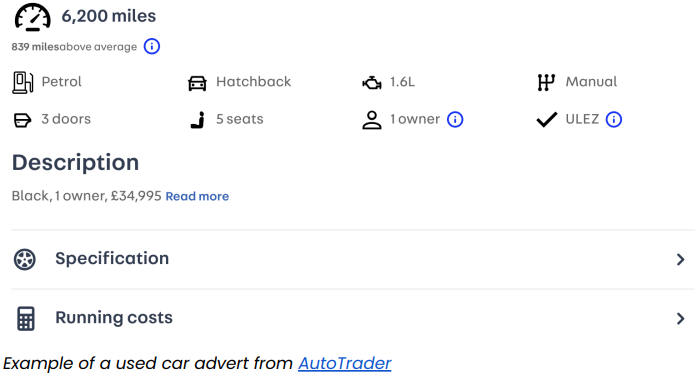

## Data
The sales team has pulled some data from the website listings from the last 6 months. All cars listed in this data were sold at the price listed. The data hasn’t been validated, so it needs to be checked against all of the information in the table.

| Column Name |   Details   |
| ----------- | ----------- |
| model | Character, the model of the car, 18 possible values |
| year |  Numeric, year of registration from 1998 to 2020 |
| price | Numeric, listed value of the car in GBP |
| transmission | Character, one of "Manual", "Automatic", "Semi-Auto" or "Other" |
| mileage | Numeric, listed mileage of the car at time of sale |
| fuelType | Character, one of "Petrol", "Hybrid", "Diesel" or "Other" |
| tax | Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car. |
| mpg | Numeric, miles per gallon as reported by manufacturer |
| engineSize | Numeric, listed engine size, one of 16 possible values |


## Load and inspect the data

In [455]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

In [456]:
# Load data
sales = pd.read_csv('toyota.csv')

In [457]:
# Inspect first five rows in the data
sales.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [458]:
# Information about the dataframe and columns
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [459]:
# Display number of missing values
sales.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

At first glance there is no missing data and the data types seem reasonable. I further examine that in the next section.

In [460]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [461]:
# Find duplicates
sales.duplicated().sum()

39

In [462]:
# Drop duplicates
sales.drop_duplicates(inplace=True)

In [463]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


This dataset has 9 columns as shown above. After I drop 39 duplicated rows, the final dataset has 6699 rows. I further clean and validate the data where needed in the next section.

## Clean and validate the data
I validate the data by looking at the unique values, frequencies and ranges in each column. There are no unexpected findings so I don't make any additional changes to the dataset.

In [464]:
# Print the number of unique values and range (if relevant) in each column
print('The number of unique values and range (if relevant) in each column is:')
print('Model:', sales['model'].nunique(), 'unique values')
print('Year:', sales['year'].nunique(), 'unique values and range is', sales['year'].min(), 'to', sales['year'].max())
print('Price:', sales['price'].nunique(), 'unique values and range is', sales['price'].min(), 'to', sales['price'].max())
print('Transmission:', sales['transmission'].nunique(), 'unique values')
print('Mileage:', sales['mileage'].nunique(), 'unique values and range is', sales['mileage'].min(), 'to', sales['mileage'].max())
print('Fuel type:', sales['fuelType'].nunique(), 'unique values')
print('Tax:', sales['tax'].nunique(), 'unique values and range is', sales['tax'].min(), 'to', sales['tax'].max())
print('MPG:', sales['mpg'].nunique(), 'unique values and range is', sales['mpg'].min(), 'to', sales['mpg'].max())
print('Engine size:', sales['engineSize'].nunique(), 'unique values and range is', sales['engineSize'].min(), 'to', sales['engineSize'].max())

The number of unique values and range (if relevant) in each column is:
Model: 18 unique values
Year: 23 unique values and range is 1998 to 2020
Price: 2114 unique values and range is 850 to 59995
Transmission: 4 unique values
Mileage: 5699 unique values and range is 2 to 174419
Fuel type: 4 unique values
Tax: 29 unique values and range is 0 to 565
MPG: 81 unique values and range is 2.8 to 235.0
Engine size: 16 unique values and range is 0.0 to 4.5


1. Unique values:

All data has a reasonable number of unique values. According to the brief, there are 18 possible unique values for 'model', 4 for 'transmission', 4 for 'fuelType', 16 for 'engineSize' and the range for 'year' is 1998 - 2020. All of this is reflected in the data.

2. Ranges

The data has ranges aligned with the data description. The range of 'year' is as expected. The ranges for 'price', 'mileage', 'tax' and 'mpg' seem to be quite wide. I will explore them further in the next section on Exploratory Data Analysis.

I examine the unique values and frequencies of all variables using .value_counts() (not shown here for brevity) and there are no unexpected findings. Here is a summary of the data which remains unchanged and is just as described in the data dictionary:
- 'model': 18 models without missing values, same as the description. No cleaning is needed.
- 'year': 23 unique values without missing values, from 1998 to 2020, same as the description. No cleaning is needed.
- 'price': numeric values without missing values, same as the description. No cleaning is needed.
- 'transmission': 4 categories without missing values, same as the description. No cleaning is needed.
- 'mileage': numeric values, same as the description. No cleaning is needed.
- 'fuelType': 4 categories without missing values, same as the description. No cleaning is needed.
- 'mpg': numeric values without missing values, same as the description. No cleaning is needed.
- 'engineSize': 16 possible values without missing values, same as the description. No cleaning is needed.

## Exploratory Data Analysis

#### Dependent Variable
The histogram of 'price' shows that the data is right-skewed so the median (10 798) is lower than the mean (12 529). Just like we saw in the previous section, the range for the data is quite wide. There are a lot of outliers on the right side of the graph. Since 'price' is the dependent variable in the model, I decide to use log transformation on it in the Feature Engineering section so that its distribution becomes closer to the normal distribution.

c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Histogram of 'price'")

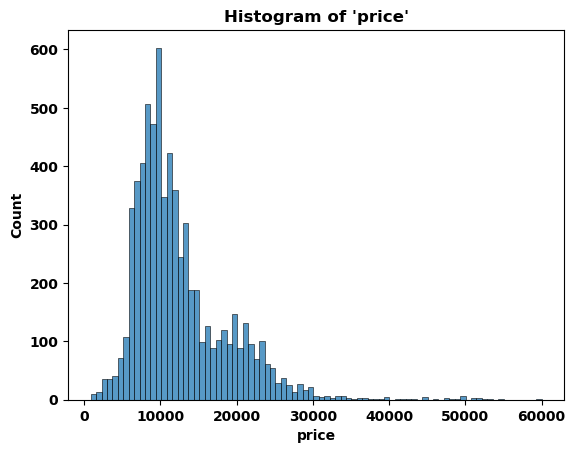

In [465]:
# Plot a histogram of 'price'
sns.histplot(x = sales['price'])
plt.title("Histogram of 'price'")

In [466]:
# Calculate the mean and median for 'price'
print("The median for 'price' is", sales['price'].median(), 'and the mean is', sales['price'].mean())

The median for 'price' is 10798.0 and the mean is 12529.79907448873


c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Histogram of 'price' after log transformation")

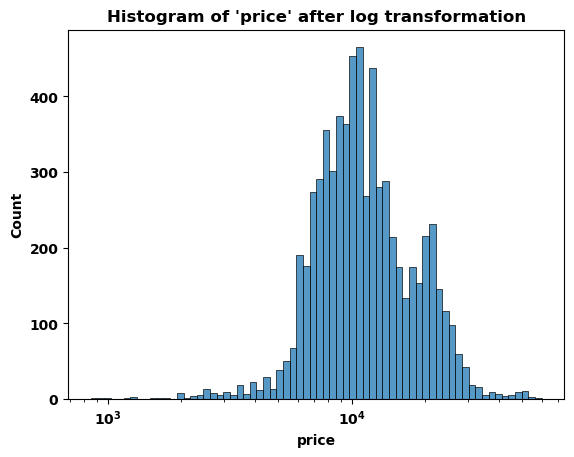

In [467]:
# Plot a histogram of 'price' after log transformation
sns.histplot(sales['price'], log_scale=True)
plt.title("Histogram of 'price' after log transformation")

#### Numeric Variables: 'mileage', 'tax', and 'mpg'
There are three numeric features in the data: 'mileage', 'tax' and 'mpg'. I look at their correlation and later non-linear relationships with the target variable 'price'. A heatmap shows two moderate negative linear relationships between variables: 1. 'mileage' and 'price', and 2. 'tax' and 'mpg'. The scatterplots also show evidence of a weak linear relationship between 'mileage' and 'price'. There are no other relationships identified. I find that the data for 'tax' and 'price' displays clusters so in the Feature Engineering section I will convert 'tax' from numeric to ordinal variable.

Text(0.5, 1.0, 'Correlation heatmap between numeric variables')

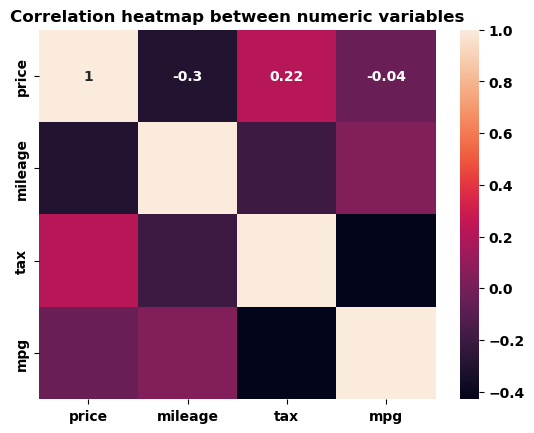

In [468]:
# Select the numeric features from the data and the target variable 'price'
numeric = sales[['price','mileage','tax','mpg']]

# Display the correlation of the numeric features and the target variable 'price'
sns.heatmap(numeric.corr(), annot=True)
plt.title('Correlation heatmap between numeric variables')

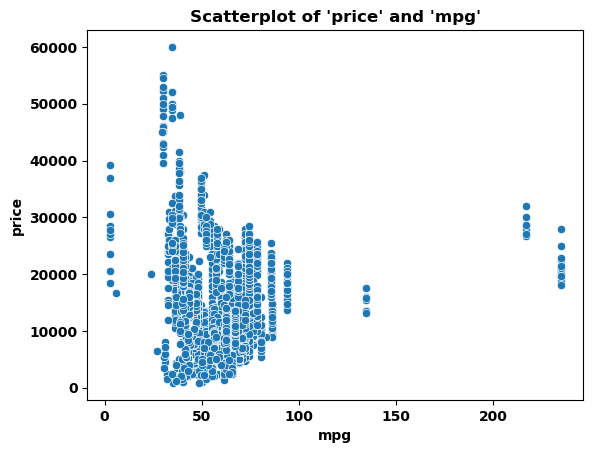

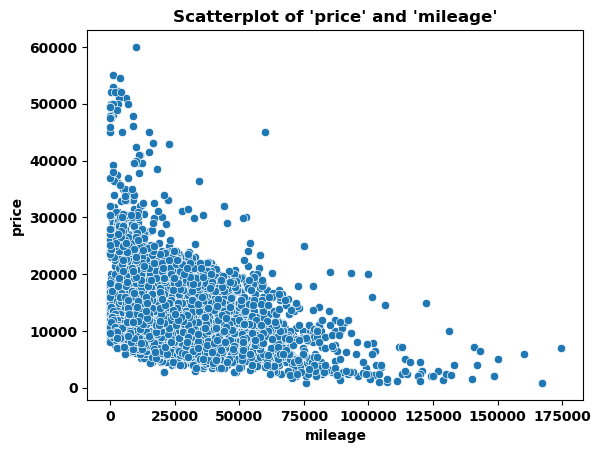

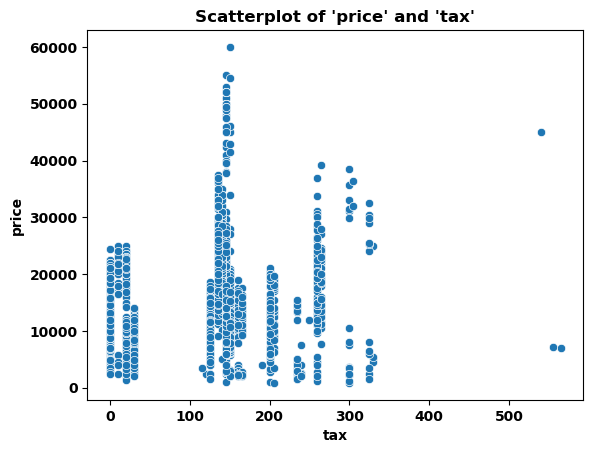

In [469]:
# Plot scatterplots for 'price' vs each numeric feature 
for i in ['mpg', 'mileage', 'tax']:
    sns.scatterplot(x = i, y = 'price', data = sales)
    plt.title("Scatterplot of 'price' and '{}'".format(i))
    plt.show()

#### Categorical Variables: 'model', 'year', 'transmission', 'fuelType', and 'engineSize'
I print out countplots for each of the categorical variables. Here are the most important findings:
- The most common manufacture year is 2016 and the distribution is left-skewed with very few data for 2012 or earlier
- The most common engine size in is 1
- The most common model is 'Yaris' and there are a few models with count close to 0 (Urban Cruiser, IQ, Verso-S, etc.)
- Most of the data in 'transmission' falls under 'Manual' or 'Automatic'
- Most of the data in 'fuelType' falls under 'Petrol' or 'Hybrid'

Next, I use scatterplots to visualize potential relationships between each of the categorical variables and the target variable 'price'. The findings are: 
- 'year' and 'engineSize' seem to be most related to 'price'. The median for 'price' increases for later years. There also appears to be an increase in the median for 'price' as 'engineSize' increases although this relationship looks weaker.
- There is a difference in distribution of 'price' among 'model', 'transmission', 'fuelType' but it is difficult to draw concrete conclusions.

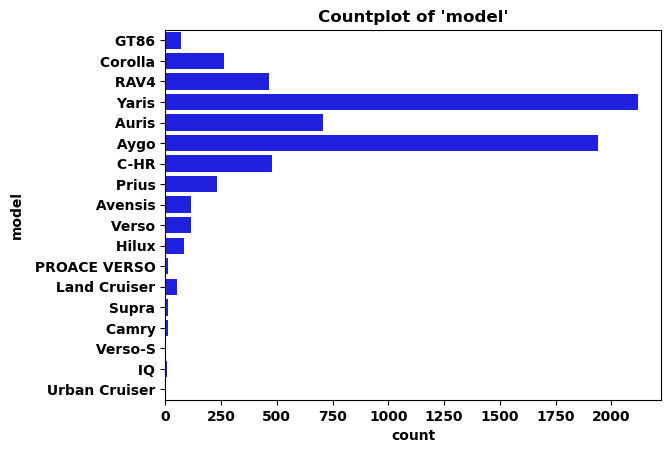

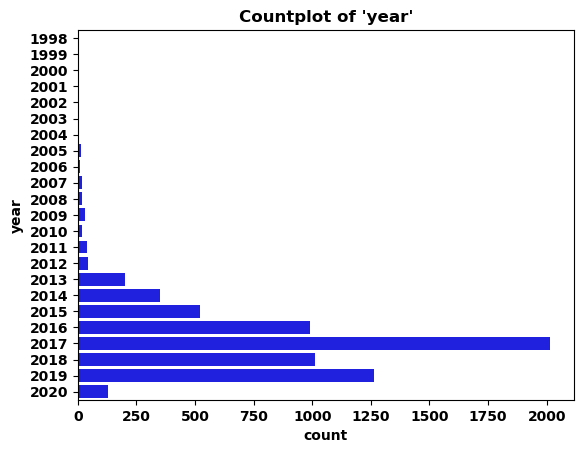

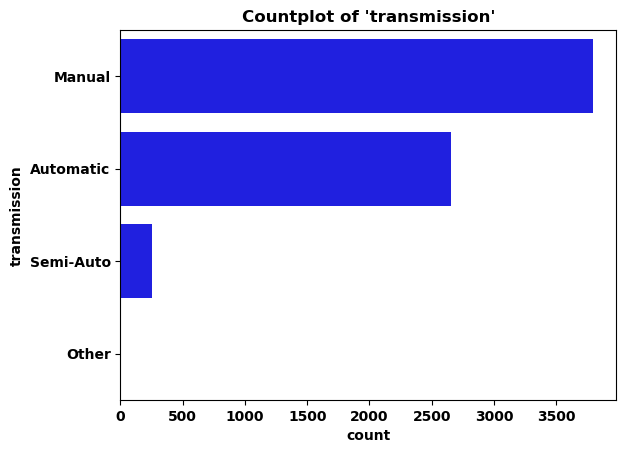

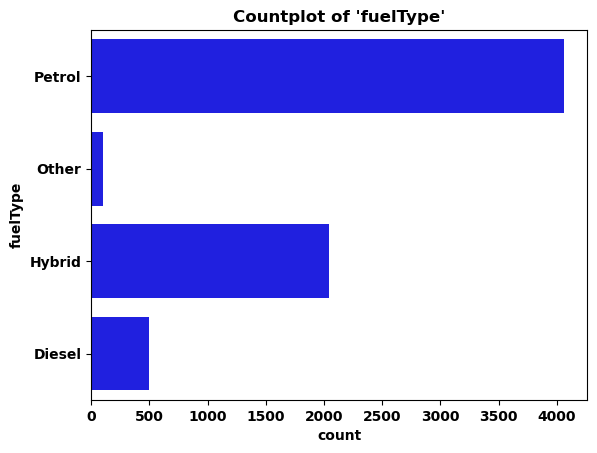

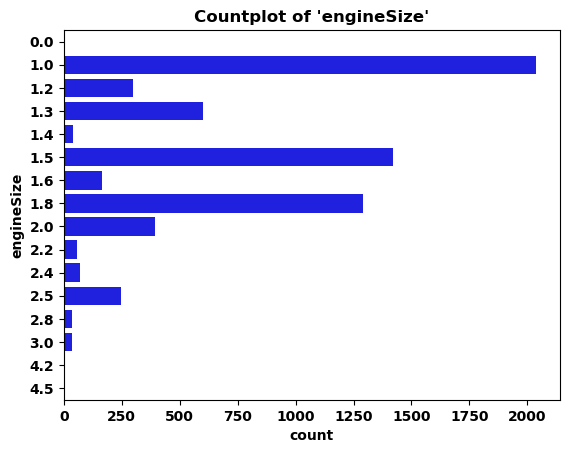

In [470]:
# Select the categorical variables in the data
categorical = sales[['model', 'year', 'transmission', 'fuelType', 'engineSize']]

# Display countplots for the categorical variables
for i in ['model', 'year', 'transmission', 'fuelType', 'engineSize']:
    sns.countplot(y = i, data = sales, color = 'blue')
    plt.title("Countplot of '{}'".format(i))
    plt.show()

'price' and 'year'


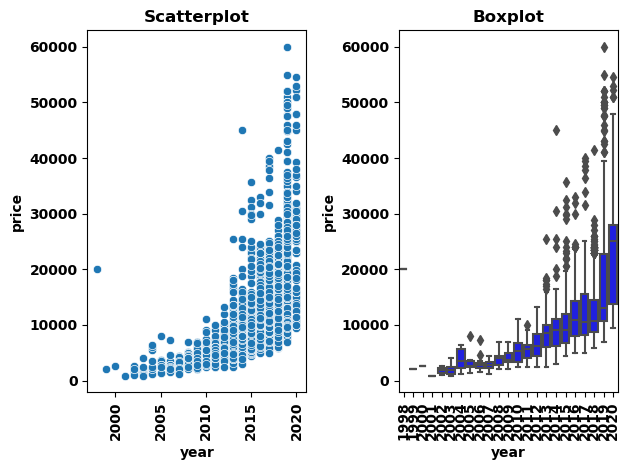

'price' and 'engineSize'


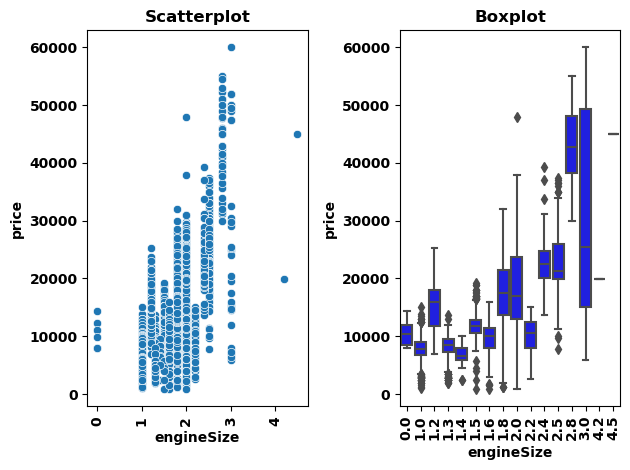

In [471]:
# Display scatterplots for 'price' and each of the categorical variables 'year' and 'engineSize'
for i in ['year', 'engineSize']:
    print("'price' and '{}'".format(i))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x = i, y = 'price', data = sales)
    plt.title('Scatterplot')
    plt.xticks(rotation = 90)

    plt.subplot(1, 2, 2)
    sns.boxplot(x = i, y = 'price', data = sales, color = 'blue')
    plt.title('Boxplot')
    plt.xticks(rotation = 90)

    plt.tight_layout()
    plt.show()

'price' and 'model'


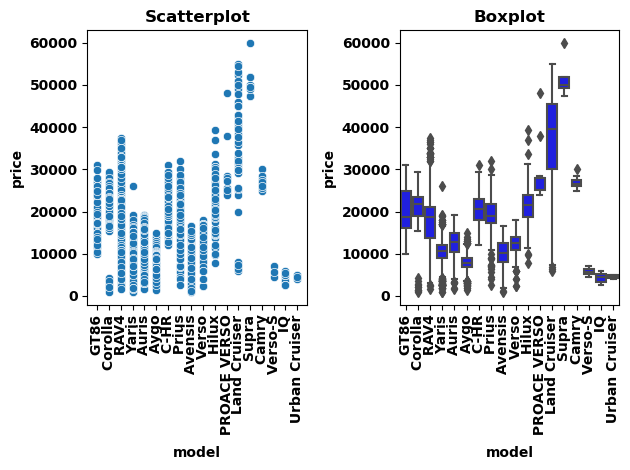

'price' and 'transmission'


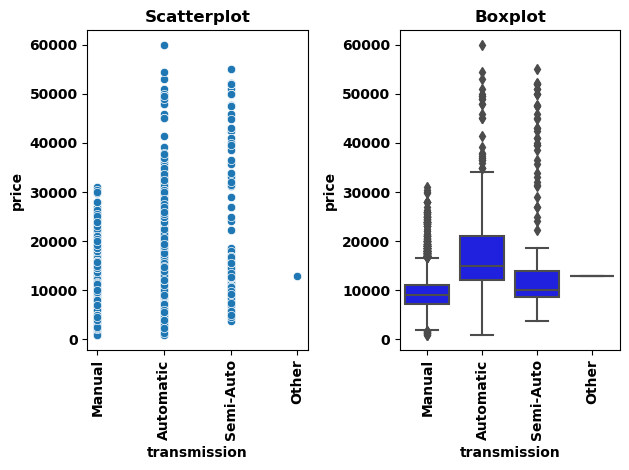

'price' and 'fuelType'


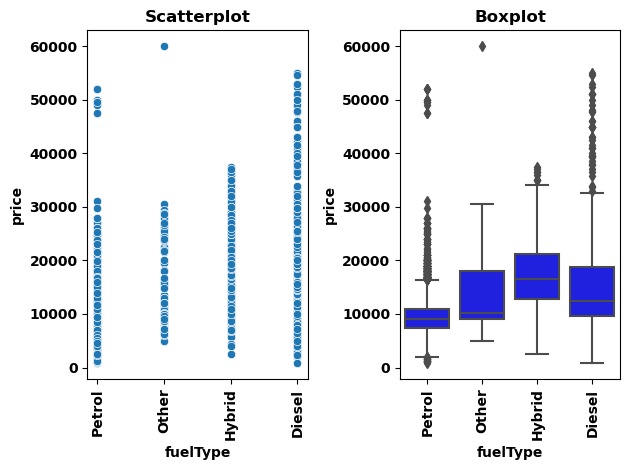

In [472]:
# Display scatterplots for 'price' and each of the remaining categorical variables
for i in ['model', 'transmission', 'fuelType']:
    print("'price' and '{}'".format(i))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x = i, y = 'price', data = sales)
    plt.title('Scatterplot')
    plt.xticks(rotation = 90)

    plt.subplot(1, 2, 2)
    sns.boxplot(x = i, y = 'price', data = sales, color = 'blue')
    plt.title('Boxplot')
    plt.xticks(rotation = 90)

    plt.tight_layout()
    plt.show()

## Feature Engineering
The target variable is 'price' and the features are 'year', 'model', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', and 'engineSize'. The following changes have been applied:
- 'price': target variable, which is right-skewed, is converted using log trasnformation
- 'tax': converted from numeric to ordinal variable since it displays clusters
- Convert the categorical variables into numeric features
- 'mileage': transformed using PowerTransformer()

In [473]:
# Convert 'price' using log transformation
sales['price'] = np.log(sales['price'])

In [474]:
# Convert 'tax' from numeric to ordinal variable
sales.loc[(sales['tax']<=100, 'tax')] = 1
sales.loc[((sales['tax']<=200) & (sales['tax']>100), 'tax')] = 2
sales.loc[((sales['tax']<=300) & (sales['tax']>200), 'tax')] = 3
sales.loc[(sales['tax']>300), 'tax'] = 4

In [475]:
# Encode the categorical data using LabelEncoder
labelencoder = LabelEncoder()
sales['model'] = labelencoder.fit_transform(sales['model'])
sales['transmission'] = labelencoder.fit_transform(sales['transmission'])
sales['fuelType'] = labelencoder.fit_transform(sales['fuelType'])

In [476]:
# Select the features
features = ['year','transmission','fuelType','engineSize','tax','model','mileage', 'mpg']
X = sales[features]

# Select the target variable
y = sales['price']

In [477]:
# Define the scaler 
scaler = PowerTransformer()

# Fit and transform the train set
X[['mileage']] = scaler.fit_transform(X[['mileage']])

C:\Users\tkirov\AppData\Local\Temp\ipykernel_40988\3697309240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['mileage']] = scaler.fit_transform(X[['mileage']])


## Model Creation and Evaluation
Since the goal of the project is to describe the relationships between a set of independent variables (both numeric and categorical) and the dependent variable 'price' (numeric variable) and build a model to predict 'price', I will use regression analysis. The two types of regression models I choose are:
- Linear regression model: There is a moderate to strong relationship between some of the independent variables and the dependent variables. A linear regression model will produce coefficients that show the strength of these relationships.
- Decision tree model: This type of model is easy to interpret and will be used as a comparison model. It also performs well in the presence of outliers which is the case with our data.

I compare the two models and I evaluate their performances using:
- R squared: measures how well the independent variables explain the variation in the dependent variable
- RMSE (Root Mean Squared Error): measures how much the predicted results deviate from the actual number. 
- Suggested custom KPI: A measure of what percentage of the predictions are within 10% of the actual price.

In [478]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Linear Regression Model

In [479]:
# Create model
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)

LinearRegression()

In [480]:
# Find predicted values from test data
y_pred_lr = lr.predict(X_test)

# Calculate scores
r2_score_lr = r2_score(y_test, y_pred_lr)
rmse_score_lr = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_lr)))

score_models = pd.DataFrame([['Linear Regression', r2_score_lr, rmse_score_lr]], columns = ['Model', 'r2_score', 'rmse_score'])
score_models

,Model,r2_score,rmse_score
0,Linear Regression,0.872186,2383.463753


Text(0.5, 1.0, 'Feature Importance in Linear Regression Model')

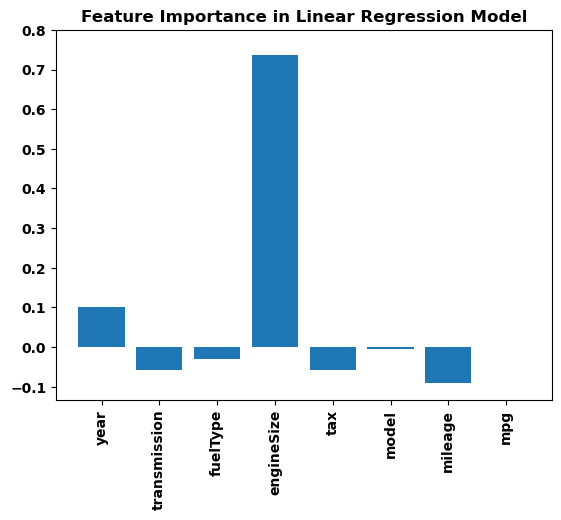

In [481]:
# Find the importance of features
resultdict = {}
for i in range(len(features)):
    resultdict[features[i]] = lr.coef_[i]
    
plt.bar(resultdict.keys(), resultdict.values())
plt.xticks(rotation = 90)
plt.yticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.title('Feature Importance in Linear Regression Model')

#### Decision Tree Model

In [482]:
# Create model
dt = DecisionTreeRegressor()

# Fit model
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [483]:
# Find predicted values from test data
y_pred_dt = dt.predict(X_test)

In [484]:
# Calculate scores
r2_score_dt = r2_score(y_test, y_pred_dt)
rmse_score_dt = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_dt)))

score_models = score_models._append({'Model':'Decision Tree', 'r2_score': r2_score_dt, 'rmse_score': rmse_score_dt}, ignore_index=True)
score_models



,Model,r2_score,rmse_score
0,Linear Regression,0.872186,2383.463753
1,Decision Tree,0.938196,1468.158540


Best max_depth is: 10 
Testing R^2 is: 0.9522651072655088


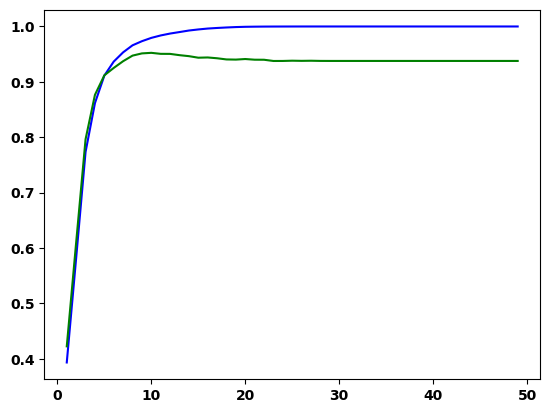

In [485]:
#### Find the best parameter for Decision Tree Model
train_score = []
test_score = []
max_score = 0
max_pair = (0,0)

for i in range(1, 50):
    tree = DecisionTreeRegressor(max_depth=i,random_state=42)
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    train_score.append(tree.score(X_train,y_train))
    test_score.append(r2_score(y_test,y_pred))
    test_pair = (i,r2_score(y_test,y_pred))
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1,50), train_score, label = "Training R^2",color='blue')
ax.plot(np.arange(1,50), test_score, label = "Testing R^2",color='green')
print(f'Best max_depth is: {max_pair[0]} \nTesting R^2 is: {max_pair[1]}')

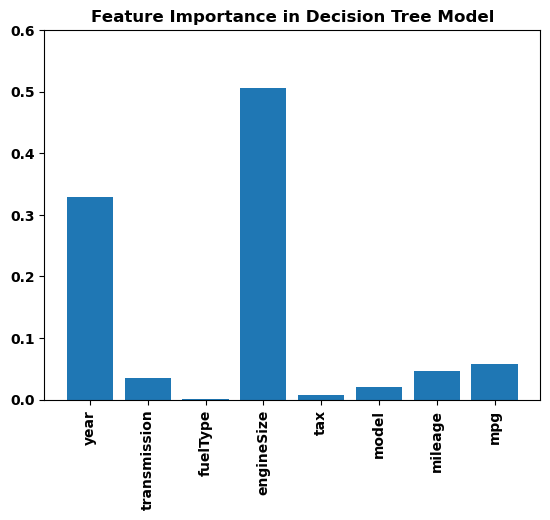

In [486]:
# Find the importance of features
importance = tree.feature_importances_
f_importance = {}
for i in range(len(features)):
     f_importance[features[i]] = importance[i]
        
plt.bar(f_importance.keys(),f_importance.values())
plt.xticks(rotation = 90)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
plt.title('Feature Importance in Decision Tree Model');

In [487]:
score_models

,Model,r2_score,rmse_score
0,Linear Regression,0.872186,2383.463753
1,Decision Tree,0.938196,1468.158540


#### Evaluation of Models
According to the brief, the company wants to predicy prices within 10% of listed price. Below I evaluate the two models I created in terms of how well they meet the criteria. The KPI I suggest is a measure of what percentage of the predictions are within 10% of the actual price. I find that the decision tree model performs better since approx. 70% of its predictions are within 10% of the actual price (vs 50% for the linear regression model). Furthermore, the decision tree model above achieves predictions within 30% of the listed price 98% of the time.

In [488]:
# Linear regression model
# Find the percentage of predicted prices within 10% of the listed price
X_test['Predicted_price'] = np.round(np.exp(y_pred_lr),0)
X_test['Price'] = np.round(np.exp(y_test),0)
lr_e = X_test
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
within_10pct = len([d for d in lr_e['Diff'] if abs(d) <= 0.1])
pct_lr = within_10pct/len(lr_e['Diff'])       
print(f'Percentage of predictions within +/- 10% range: {pct_lr}')

# Find the percentage of predicted prices within 30% of the listed price
within_30pct = len([d for d in lr_e['Diff'] if abs(d) <= 0.3])
pct_lr2 = within_30pct/len(lr_e['Diff'])       
print(f'Percentage of predictions within +/- 30% range: {pct_lr2}')

Percentage of predictions within +/- 10% range: 0.49850746268656715
Percentage of predictions within +/- 30% range: 0.9373134328358209


Text(0, 0.5, 'Count')

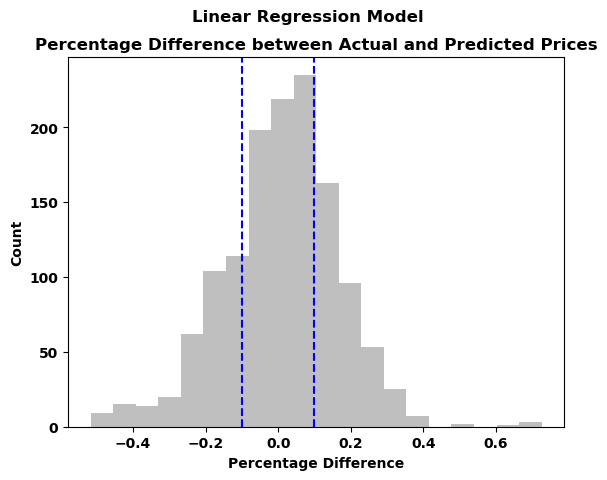

In [489]:
# Visualize the percentage difference between actual and predicted prices
lr_e['Diff'] = (lr_e['Predicted_price'] - lr_e['Price'])/lr_e['Price']
plt.hist(lr_e['Diff'], bins=20, color='gray',alpha=0.5)
plt.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
plt.axvline(x=-0.1, color='b', linestyle='--')
plt.title('Percentage Difference between Actual and Predicted Prices')
plt.suptitle('Linear Regression Model')
plt.xlabel('Percentage Difference')
plt.ylabel('Count')

In [490]:
# Decision tree model
# Find the percentage of predicted prices within 10% of the listed price
X_test['Predicted_price'] = np.round(np.exp(y_pred_dt),0)
X_test['Price'] = np.round(np.exp(y_test),0)
tree_e = X_test
tree_e['Diff'] = (tree_e['Predicted_price'] - tree_e['Price'])/tree_e['Price']
within_10pct = len([d for d in tree_e['Diff'] if abs(d) <= 0.1])
pct_tree = within_10pct/len(tree_e['Diff'])       
print(f'Percentage of predictions within +/- 10% range: {pct_tree}')

# Find the percentage of predicted prices within 30% of the listed price
within_30pct = len([d for d in tree_e['Diff'] if abs(d) <= 0.3])
pct_tree2 = within_30pct/len(tree_e['Diff'])       
print(f'Percentage of predictions within +/- 30% range: {pct_tree2}')

Percentage of predictions within +/- 10% range: 0.6955223880597015
Percentage of predictions within +/- 30% range: 0.9798507462686568


Text(0, 0.5, 'Count')

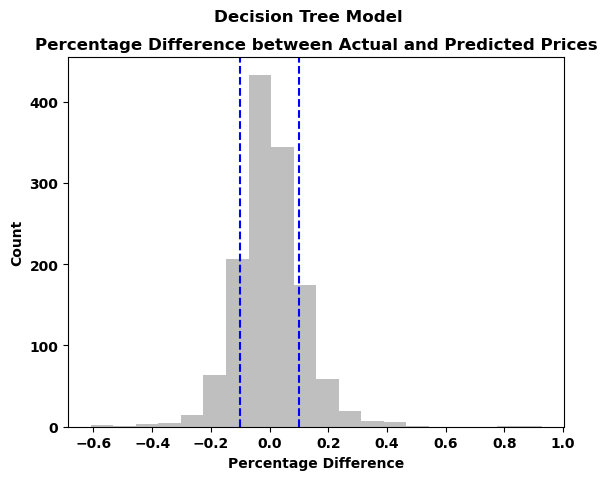

In [491]:
# Visualize the percentage difference between actual and predicted prices
plt.hist(tree_e['Diff'], bins=20,color='gray', alpha=0.5)
plt.axvline(x=0.1, color='b', linestyle='--', label='+/- 10% range')
plt.axvline(x=-0.1, color='b', linestyle='--')
plt.title('Percentage Difference between Actual and Predicted Prices')
plt.suptitle('Decision Tree Model')
plt.xlabel('Percentage Difference')
plt.ylabel('Count')

In [492]:
# Add the new KPI to the score_models dataframe
score_models['KPI'] = [pct_lr, pct_tree]
score_models

,Model,r2_score,rmse_score,KPI
0,Linear Regression,0.872186,2383.463753,0.498507
1,Decision Tree,0.938196,1468.158540,0.695522


## Conclusion and Recommendations
Compared to the linear regression model, the decision tree model has higher R squared score (0.94 vs 0.87), i.e. it fits the data better. Furthermore, it has lower RMSE score (1468 vs 2383) so it has less error in predicting values. The model is also easy to interpret. Finally, and most importantly, it performs better in terms of the suggested KPI - approx. 70% of the predictions made by the decision tree model fall within 10% of the price. Therefore, I recommend that the company deploys the decision tree model to automate the selling process. 

In addition, I recommend:
1. Test the model against the estimations of the experienced member during the latest month.
2. Deploy the model using efficient deployment strategy, e.g., a web, mobile application or API.
3. Improve the model by 
- Collecting more data: for this project the sales team provided data for the last six months but it will be beneficial to add data for a longer period.
- Adding additional features: any other potential features available, e.g., related to upcoming legislation about zero emissions, could be tested in the model.
- Fine-tuning parameters: not included here for brevity but it is a potential next step.